<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/K_Means_Algorithms_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
permuted_arr = np.random.permutation(arr)
print(permuted_arr)

[3 4 2 5 1]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#Assign every point to closest cluster centroid
def find_closest_centroids(X, centroids):
    """
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = (np.sum(X[i]-centroids[j])**2)
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    #distances = np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2)

    # Find the index of the minimum distance for each data point
    #idx = np.argmin(distances, axis=1)

    return idx

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    for k in range(K):
        clusters_index = np.where(idx == k)[0]
        points = X[clusters_index,:]
        centroids[k] = np.sum(points,axis = 0)/len(points)
        #centroids[k] = np.mean(points,axis=0)

    return centroids

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [19]:
def kMeans_init_centroids(X,K):
    randidx = np.random.permutation(X.shape[0])
    centroid = X[randidx[:K]]
    return centroid

In [9]:
original_image = plt.imread("/content/bird_image.jpeg")

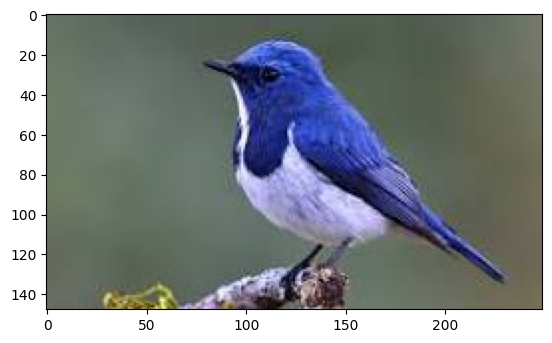

In [10]:
plt.imshow(original_image)

In [13]:
print("Shape of original_img is:", original_image.shape)

Shape of original_img is: (148, 249, 3)


In [15]:
original_image = original_image / 255

In [17]:
X_img = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], 3))

In [20]:
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [36]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (36852,)
Closest centroid for the first five elements: [10 10 10 10 15]
(16, 3)


In [38]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_image.shape)
print(original_image.shape)
print(X_recovered.shape)

(148, 249, 3)
(148, 249, 3)


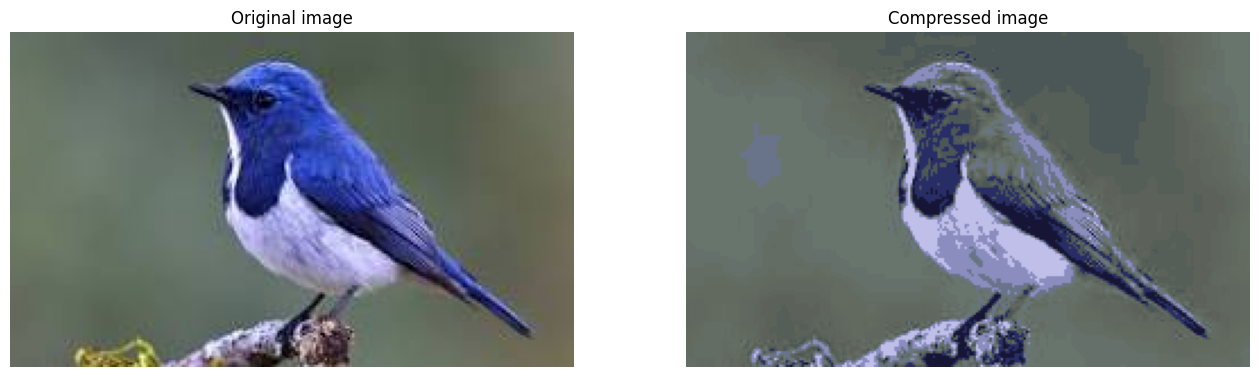

In [42]:
fig,ax = plt.subplots(1,2,figsize = (16,16))

ax[0].imshow(original_image)
ax[0].set_title("Original image")
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title("Compressed image")
ax[1].set_axis_off()